In [1]:
import mxnet as mx
from mxnet import nd
from mxnet import autograd

In [3]:
x = nd.array([[1,2],[3,4]])
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

In [4]:
x.attach_grad()

In [5]:
def f(x):
    return 2 * x**2

In [6]:
with autograd.record():
    y = f(x)

In [7]:
x, y

(
 [[1. 2.]
  [3. 4.]]
 <NDArray 2x2 @cpu(0)>, 
 [[ 2.  8.]
  [18. 32.]]
 <NDArray 2x2 @cpu(0)>)

In [8]:
y.backward()

In [9]:
x, x.grad

(
 [[1. 2.]
  [3. 4.]]
 <NDArray 2x2 @cpu(0)>, 
 [[ 4.  8.]
  [12. 16.]]
 <NDArray 2x2 @cpu(0)>)

In [10]:
x = nd.random.uniform(-1,1, shape=2)
x


[0.09762704 0.18568921]
<NDArray 2 @cpu(0)>

In [11]:
x.attach_grad()
with autograd.record():
    y = f(x)
y.backward()

In [14]:
x, x.grad

(
 [0.09762704 0.18568921]
 <NDArray 2 @cpu(0)>, 
 [0.39050817 0.74275684]
 <NDArray 2 @cpu(0)>)

In [15]:
from mxnet import nd, autograd

x = nd.array([[1, 0], [0, 1]])
y = nd.array([[1, 1], [1, 1]])
x.attach_grad()
y.attach_grad()
f = lambda x,y : x**2 + y**2
with autograd.record():
    z = f(x, y)
z.backward()
print(x.grad * y.grad)


[[4. 0.]
 [0. 4.]]
<NDArray 2x2 @cpu(0)>


In [17]:
from mxnet import nd, autograd, optimizer, gluon

In [18]:
net = gluon.nn.Dense(1)
net.initialize()

In [43]:
?nd.random.uniform

In [44]:
?gluon.loss.L2Loss

In [65]:
batch_size = 8
x = nd.random.uniform(shape=(batch_size,4))
y = nd.random.uniform(shape=(batch_size,))

loss = gluon.loss.L2Loss()

In [66]:
x, y

(
 [[0.3494403  0.07041083 0.7814796  0.4218445 ]
  [0.7510216  0.3883196  0.9272118  0.16039354]
  [0.02895255 0.35020727 0.8956913  0.09561988]
  [0.3925688  0.8711025  0.8783725  0.6675933 ]
  [0.69078475 0.19271797 0.98734874 0.91809195]
  [0.75928247 0.5796809  0.36454463 0.45589843]
  [0.50106317 0.64235175 0.37638915 0.25402522]
  [0.36491182 0.55107915 0.2609045  0.13190325]]
 <NDArray 8x4 @cpu(0)>, 
 [0.4959703  0.20051602 0.6817399  0.5140545  0.27734026 0.09749339
  0.5243798  0.8518537 ]
 <NDArray 8 @cpu(0)>)

In [67]:
def forward_backward():
    with autograd.record():
        l = loss(weight=net(x), batch_axis=y)
    l.backward()    
forward_backward()

MXNetError: Shape inconsistent, Provided = [1,1], inferred shape=(1,4)

In [34]:
# stochastic gradient descent
trainer = gluon.Trainer(net.collect_params(),
                       optimizer='sgd', optimizer_params={'learning_rate':1})

In [35]:
curr_weight = net.weight.data().copy()
print(curr_weight)


[[0.0418822]]
<NDArray 1x1 @cpu(0)>


In [68]:
trainer.step(batch_size)
print(net.weight.data)

<bound method Parameter.data of Parameter dense0_weight (shape=(1, 1), dtype=float32)>


In [70]:
# nother way to delcare optimizer
optim = optimizer.Adam(learning_rate=1)
trainer = gluon.Trainer(net.collect_params(), optim)

In [71]:
forward_backward()
trainer.step(batch_size)
net.weight.data()

MXNetError: Shape inconsistent, Provided = [1,1], inferred shape=(1,4)

In [95]:
import mxnet as mx
from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [96]:
mx.random.seed(42)
x = mx.random.uniform(shape=(10,3))
y = mx.random.uniform(shape=(10,1))

In [97]:
dataset = gluon.data.dataset.ArrayDataset(x,y)

In [102]:
sample = dataset[4]
sample

(
 [0.74707687 0.37641123 0.46362457]
 <NDArray 3 @cpu(0)>, 
 [0.35440788]
 <NDArray 1 @cpu(0)>)

In [77]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
valid_dataset = gluon.data.vision.datasets.MNIST(train=False)

(28, 28, 1)


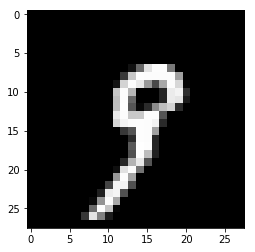

In [78]:
sample_image = train_dataset[19][0]
print(sample_image.shape)
imshow(sample_image[:,:,0].asnumpy(), cmap='gray')

# Transofrmations

In [79]:
import mxnet as mx
from mxnet import gluon, nd

In [80]:
def transform_fn(data, label):
    data = data.astype('float32')/255
    return data, label
train_dataset = gluon.data.vision.datasets.MNIST(train=True).transform(transform_fn)
train_dataset = gluon.data.vision.datasets.MNIST(train=False).transform(transform_fn)

sample_image = train_dataset[19][0]
nd.max(sample_image)


[1.]
<NDArray 1 @cpu(0)>

In [81]:
from mxnet.gluon.data.vision import transforms

In [82]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
train_dataset[19][0].shape

(28, 28, 1)

In [83]:
train_dataset = train_dataset.transform_first(transforms.ToTensor())
train_dataset[19][0].shape

(1, 28, 28)

In [84]:
# normalize
mean, std = (0.1307,),(0.3081,)
normalize = transforms.Normalize(mean, std)
train_dataset = train_dataset.transform_first(normalize)

In [85]:
# compose
transform_fn = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize(mean, std)])

In [86]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True).transform(transform_fn)

# Data Loaders

In [87]:
import mxnet as mx
from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [88]:
mx.random.seed(42)
x = mx.random.uniform(shape=(10,3))
y = mx.random.uniform(shape=(10,1))
dataset = gluon.data.dataset.ArrayDataset(x,y)

In [89]:
data_loader = gluon.data.DataLoader(dataset, batch_size=5, last_batch='keep')
for x_batch, y_batch in data_loader:
    print('x_batch has shape {}, and y_batch has shape {}'.format(x_batch.shape, y_batch.shape))

x_batch has shape (5, 3), and y_batch has shape (5, 1)
x_batch has shape (5, 3), and y_batch has shape (5, 1)


In [90]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
transform_fn = transforms.Compose([transforms.RandomFlipTopBottom(),
                                  transforms.RandomFlipLeftRight()])

In [91]:
train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform_fn), batch_size=5, shuffle=True)

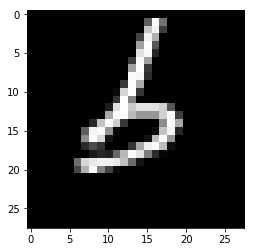

In [94]:
for x_batch, y_batch in train_dataloader:
    imshow(x_batch[3,:,:,0].asnumpy(), cmap='gray')
    break